In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
if os.path.exists('/content/drive/My Drive/Project data'):
  print('Google Drive mounted successfully!')
else:
  print('Failed to mount Google Drive. Please check your credentials and network connection.')

Google Drive mounted successfully!


<ipython-input-20-d1b60ce5d8a8>:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_grouped = df.groupby(['PARTNER COUNTRY', 'YEAR']).apply(lambda group: group.interpolate(method='linear'))
<ipython-input-20-d1b60ce5d8a8>:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_grouped = df.groupby(['PARTNER COUNTRY', 'YEAR']).apply(lambda group: group.interpolate(method='linear'))
<ipython-input-20-d1b60ce5d8a8>:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_grouped = df.groupby(['PARTNER COUNTRY', 'YEAR']).apply(lambda group: group.interpolate(method='linear'))
<ipython-input-20-d1b60ce5d8a8>:9: FutureWarning: Da

Missing Values After Fill:
 REPORTER COUNTRY            0
PARTNER COUNTRY             0
YEAR                        0
IMPORT (US DOLLAR)          0
EXPORT (US DOLLAR)          0
GDP (NIGERIA)               0
GDP (PARTNER)               0
POPULATION (NIGERIA)        0
POPULATION (PARTNER)        0
DISTANCE                    0
EXCHANGE RATE (NIGERIA)     0
EXCHANGE RATE (PARTNER)     0
LANDLOCKED                  0
COMMON OFFICIAL LANGUAGE    0
dtype: int64


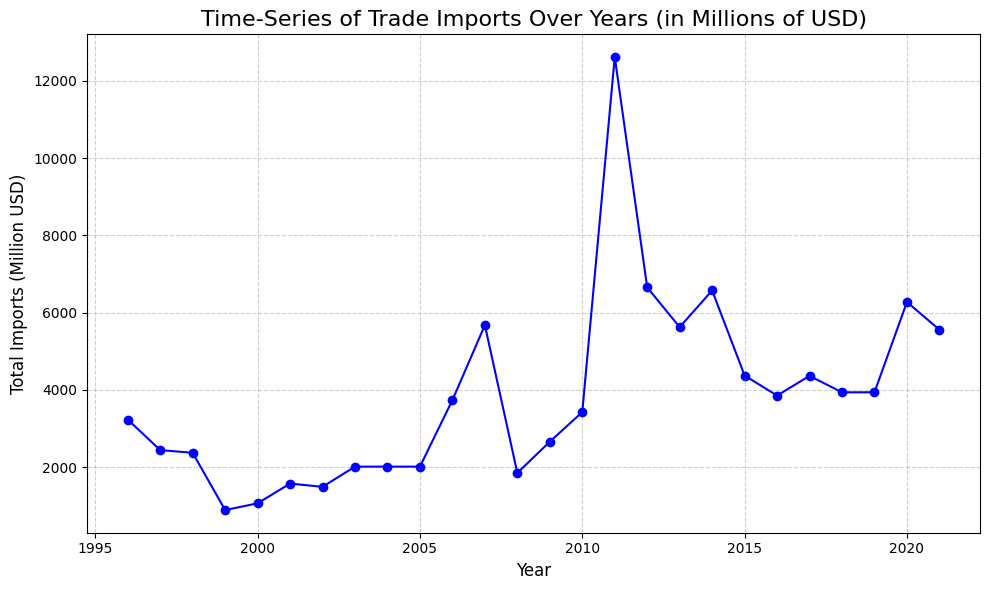

In [ ]:
# Group and interpolate the data
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Project data/Edited propper 2.csv')

# Group by 'PARTNER COUNTRY' and 'YEAR', then apply linear interpolation
df_grouped = df.groupby(['PARTNER COUNTRY', 'YEAR']).apply(lambda group: group.interpolate(method='linear'))

# Apply forward fill followed by backward fill to handle remaining missing values
df_grouped_ffill_bfill = df_grouped.ffill().bfill()

# Check for missing values after forward and backward fill
missing_values_after_ffill_bfill = df_grouped_ffill_bfill.isnull().sum()
print("Missing Values After Fill:\n", missing_values_after_ffill_bfill)

# Save the filled DataFrame to a new CSV file
df_grouped_ffill_bfill.to_csv('/content/drive/My Drive/Project data/filled edited data.csv', index=False)

# Group the data by year and sum the imports
# Use the 'level' parameter in groupby to specify grouping by the 'YEAR' index level
imports_per_year = df_grouped_ffill_bfill.groupby(level='YEAR')['IMPORT (US DOLLAR)'].sum()

# Convert values to millions of dollars for readability
imports_per_year = imports_per_year / 1e6

# Create the time-series plot
plt.figure(figsize=(10, 6))
plt.plot(imports_per_year.index, imports_per_year.values, marker='o', color='b', label='Imports')
plt.title("Time-Series of Trade Imports Over Years (in Millions of USD)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Imports (Million USD)", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

Fitting 3 folds for each of 108 candidates, totalling 324 fits
                    feature  importance
1             GDP (PARTNER)    0.370013
3      POPULATION (PARTNER)    0.285477
6   EXCHANGE RATE (PARTNER)    0.139794
5   EXCHANGE RATE (NIGERIA)    0.061234
2      POPULATION (NIGERIA)    0.054987
0             GDP (NIGERIA)    0.047577
4                  DISTANCE    0.035783
7                LANDLOCKED    0.002762
8  COMMON OFFICIAL LANGUAGE    0.002373


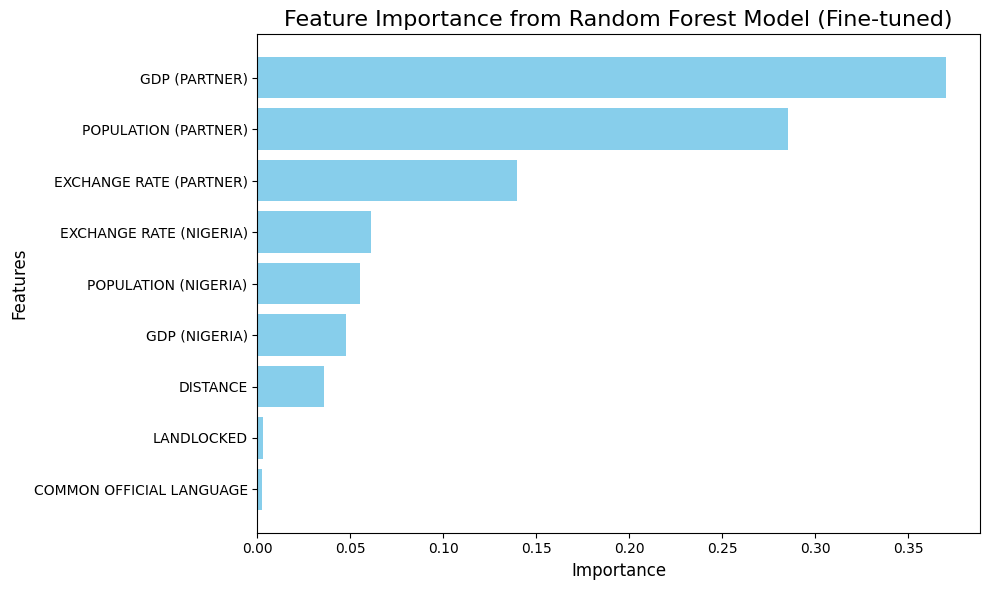

In [ ]:
# Perform the Random Forest regression using the df_scaled dataframe
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the scaled data
df_scaled = pd.read_csv('/content/drive/My Drive/Project data/scaled filled data.csv')

# Define the features excluding 'EXPORT (US DOLLAR)' and the target variable
X = df_scaled.drop(['IMPORT (US DOLLAR)', 'EXPORT (US DOLLAR)', 'REPORTER COUNTRY', 'PARTNER COUNTRY', 'YEAR'], axis=1)
y = df_scaled['IMPORT (US DOLLAR)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the Random Forest Regressor and the parameter grid
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the Grid Search on the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search_rf.best_params_

# Train the Random Forest model with the best parameters
best_model_rf = RandomForestRegressor(**best_params, random_state=42)
best_model_rf.fit(X_train, y_train)

# Get feature importance
importance_rf_best = best_model_rf.feature_importances_

# Create a dataframe with feature importance
feature_importance_rf_best = pd.DataFrame({'feature': X_train.columns, 'importance': importance_rf_best})

# Sort by importance
feature_importance_rf_best = feature_importance_rf_best.sort_values(by='importance', ascending=False)
print(feature_importance_rf_best)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf_best['feature'], feature_importance_rf_best['importance'], color='skyblue')
plt.title("Feature Importance from Random Forest Model (Fine-tuned)", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.gca().invert_yaxis()  # Flip the axis to display the most important feature at the top
plt.tight_layout()

# Show plot
plt.show()


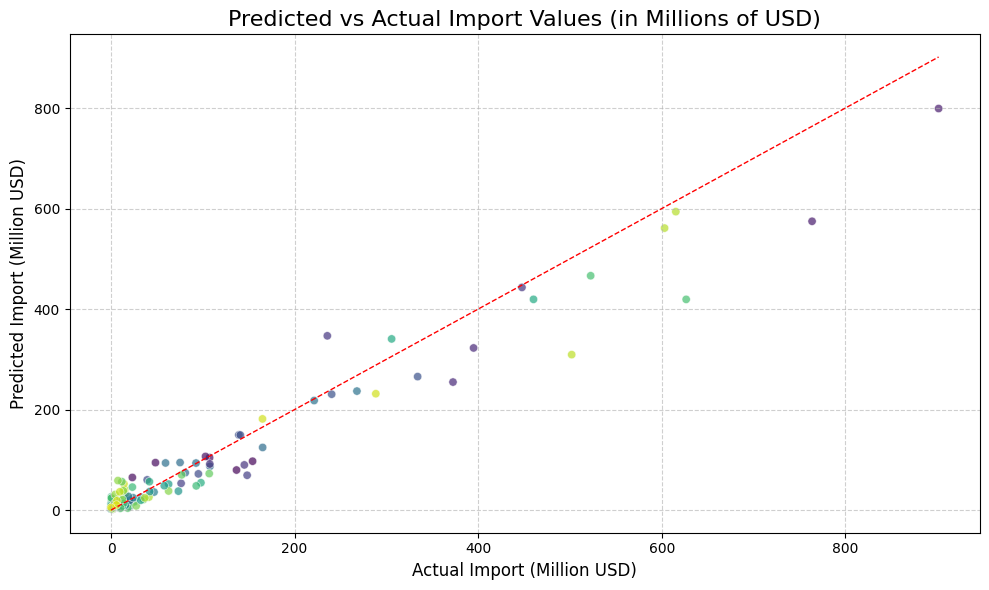

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Predicted vs Actual data
predicted_vs_actual = pd.read_csv('/content/drive/My Drive/Project data/Predicted vs actual.csv', skiprows=3)

# Clean up the data
predicted_vs_actual.columns = ["PARTNER COUNTRY", "YEAR", "PREDICTED IMPORT (US DOLLAR)", "ACTUAL IMPORT (US DOLLAR)"]
predicted_vs_actual_cleaned = predicted_vs_actual.dropna()

# Convert data types
predicted_vs_actual_cleaned["YEAR"] = predicted_vs_actual_cleaned["YEAR"].astype(int)
predicted_vs_actual_cleaned["PREDICTED IMPORT (US DOLLAR)"] = predicted_vs_actual_cleaned["PREDICTED IMPORT (US DOLLAR)"].astype(float)
predicted_vs_actual_cleaned["ACTUAL IMPORT (US DOLLAR)"] = predicted_vs_actual_cleaned["ACTUAL IMPORT (US DOLLAR)"].astype(float)

# Convert values to millions of dollars (divide by 1,000,000)
predicted_vs_actual_cleaned["PREDICTED IMPORT (US DOLLAR)"] /= 1e6
predicted_vs_actual_cleaned["ACTUAL IMPORT (US DOLLAR)"] /= 1e6

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=predicted_vs_actual_cleaned,
    x="ACTUAL IMPORT (US DOLLAR)",
    y="PREDICTED IMPORT (US DOLLAR)",
    hue="PARTNER COUNTRY",
    palette="viridis",
    legend=False,
    alpha=0.7
)

# Add line for perfect predictions
plt.plot([0, predicted_vs_actual_cleaned["ACTUAL IMPORT (US DOLLAR)"].max()],
         [0, predicted_vs_actual_cleaned["ACTUAL IMPORT (US DOLLAR)"].max()],
         color="red", linestyle="--", linewidth=1)

plt.title("Predicted vs Actual Import Values (in Millions of USD)", fontsize=16)
plt.xlabel("Actual Import (Million USD)", fontsize=12)
plt.ylabel("Predicted Import (Million USD)", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()
